/Users/abdallahelahee/Desktop/franglais-nlp-research/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


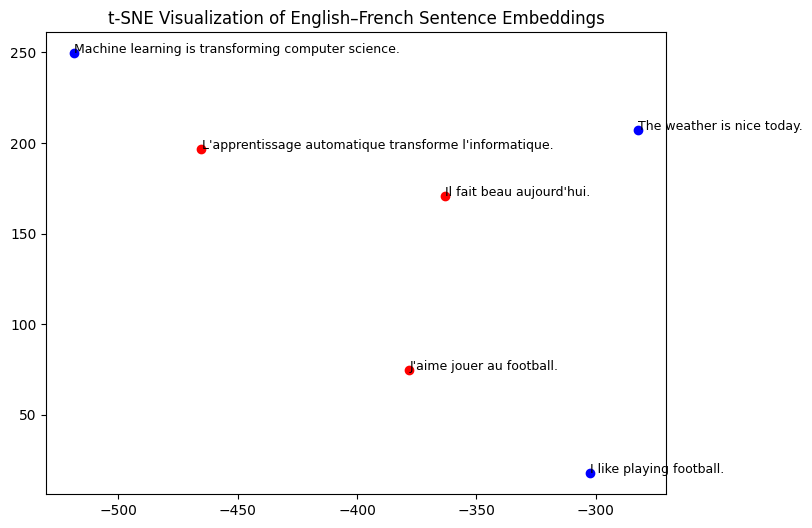

In [1]:
import sys
sys.path.append("../src")

from preprocessing import preprocess_text
from embeddings import embed_texts
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Sentences
english = [
    "Machine learning is transforming computer science.",
    "I like playing football.",
    "The weather is nice today."
]

french = [
    "L'apprentissage automatique transforme l'informatique.",
    "J'aime jouer au football.",
    "Il fait beau aujourd'hui."
]

# Preprocess
clean_en = [preprocess_text(s, lang="en") for s in english]
clean_fr = [preprocess_text(s, lang="fr") for s in french]

# Embed
emb_en = embed_texts(clean_en)
emb_fr = embed_texts(clean_fr)

# Combine for visualization
emb_all = np.vstack([emb_en, emb_fr])
labels = ["EN"] * len(english) + ["FR"] * len(french)
texts = english + french

# Dimensionality reduction
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)
points = tsne.fit_transform(emb_all)

# Plot
plt.figure(figsize=(8, 6))

for i, (x, y) in enumerate(points):
    color = "blue" if labels[i] == "EN" else "red"
    plt.scatter(x, y, color=color)
    plt.text(x + 0.02, y + 0.02, texts[i], fontsize=9)

plt.title("t-SNE Visualization of English–French Sentence Embeddings")
plt.show()
